In [1]:
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

from keras.applications import (vgg16,  vgg19, xception, 
                                inception_v3,  inception_resnet_v2, 
                                mobilenet,densenet, nasnet, mobilenet_v2)

nb_closest_images = 5 # number of most similar images to retrieve

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
#https://www.kaggle.com/jonathanoheix/product-recommendation-based-on-visual-similarity
import os
"""os.chdir'/home/jupyter/train/')
files = ['D:/Documents/MangAI/src/Dataset/pictures/' + x for x in os.listdir() if x.endswith('jpg')]
files[:10]"""

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

"os.chdir'/home/jupyter/train/')\nfiles = ['D:/Documents/MangAI/src/Dataset/pictures/' + x for x in os.listdir() if x.endswith('jpg')]\nfiles[:10]"

In [2]:
'''manga = pd.read_csv('MangaUpdated.csv')
manga["title"] = manga["title"].replace({"%" : ""}, regex=True)
manga= manga[(manga["title"] != "") & (manga["title"].notnull()) & (manga["poster"].notnull())]

import requests
from tqdm import tqdm 

keep_in_memory = []

for url, title in tqdm(zip(manga["poster"], manga["title"])) : 
    str_name = "/home/jupyter/Untitled Folder/%s.jpg" %title
    str_name = str_name.strip()
    keep_in_memory.append(str_name)
    with open(str_name, 'wb') as f:
        f.write(requests.get(url).content)
        
manga["pics_ref"] = keep_in_memory

manga.to_csv('MangaUpdated.csv', index=False, encoding='utf-8', sep =',')

'''

7141it [08:08, 14.48it/s]WARNING: Logging before flag parsing goes to stderr.
E1015 06:48:16.886309 139948949329664 ultratb.py:155] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-c13fb03fe2ce>", line 15, in <module>
    f.write(requests.get(url).content)
  File "/home/jupyter/.local/lib/python3.5/site-packages/requests/api.py", line 75, in get
    return request('get', url, params=params, **kwargs)
  File "/home/jupyter/.local/lib/python3.5/site-packages/requests/api.py", line 60, in request
    return session.request(method=method, url=url, **kwargs)
  File "/home/jupyter/.local/lib/python3.5/site-packages/requests/sessions.py", line 533, in request
    resp = self.send(prep, **send_kwargs)
  File "/home/jupyter/.local/lib/python3.5/site-packages/requests/sessions.py", line 646, in send
    r = adapter.send(request, **kwargs)
  File "/home/jupyter/.local/lib/python3.5/site-packages/requests/adapters.py", line 449, in send
    timeout=timeout
  F

KeyboardInterrupt: 

In [2]:
manga = pd.read_csv('MangaUpdated.csv')

manga["genre"] = manga["genre"].str.strip()
manga["genre"] = manga["genre"] +  " ,"

import re

def clean(genre, string_to_filter) :
    return re.sub('(?<={})(.*\n?)(?=,)'.format(string_to_filter), '', genre)

manga["genre"] = manga["genre"].apply(lambda  x : clean(str(x), 'Comic'))
manga["genre"] = manga["genre"].apply(lambda  x : clean(str(x), 'Action'))
manga["genre"] = manga["genre"].apply(lambda  x : clean(str(x), 'Josei'))
manga["genre"] = manga["genre"].apply(lambda  x : clean(str(x), 'Shoujo'))
manga["genre"] = manga["genre"].apply(lambda  x : clean(str(x), 'Shounen'))
manga["genre"] = manga["genre"].apply(lambda  x : clean(str(x), 'Horror'))

manga.head()

,title,genre,poster,staff,score,synopsis,popularity,pics_ref
0,Z,"Action,",https://cdn.myanimelist.net/images/manga/2/457...,Aoike Yasuko,7.03,"The adventures of Agent Z, the newest recruit ...",24669,/home/jupyter/Untitled Folder/Z.jpg
1,y,"Hentai , School , Doujinshi ,",https://cdn.myanimelist.net/images/manga/2/153...,Kishi Kaisei,6.24,1. y[16:21-20:47] Imakara Atashi Okasaremasu.,25046,/home/jupyter/Untitled Folder/y.jpg
2,Zion_no_Koeda,"Drama , Historical , Yaoi , Magazine Be x Boy ,",https://cdn.myanimelist.net/images/manga/3/251...,Inariya Fusanosuke,7.04,A former Nazi official is kept captive by the ...,4242,/home/jupyter/Untitled Folder/Zion_no_Koeda.jpg
3,Yuuwaku_no_Bansan,"Romance , Josei,",https://cdn.myanimelist.net/images/manga/2/116...,Katsumoto Kasane,6.70,From StarryHeaven:,4916,/home/jupyter/Untitled Folder/Yuuwaku_no_Bansa...
4,Yume_no_Akichi,"Dementia , Drama , Fantasy , Supernatural , Ps...",https://cdn.myanimelist.net/images/manga/3/137...,Oda Hideji,7.02,Renei thinks she's going crazy. After many yea...,14175,/home/jupyter/Untitled Folder/Yume_no_Akichi.jpg


In [3]:
manga['genre'] = [list(map(str.strip, y)) for y in [x.split(',') for x in manga['genre']]]

manga['genre'] =[','.join(x) for x in manga['genre']]

my_cat = ['Action', 'Adventure', 'Comedy', 'Hentai',
          'Harem', 'Fantasy', 'Drama', 'Horror', 'Romance','Josei',
          'Fantasy', 'Seinen', 'Sci-Fi', 'Slice of Life', 'Mecha', 'Yaoi',
          'Yuri', 'Thriller', 'Comic']

#manga["genre"] = manga["genre"].str.replace(" ","")
'''manga = manga[(manga["genre"].notnull()) | (manga["genre"] != '')]

manga["split_len"] = [len(str(x).split(',')) for x in manga["genre"]]
manga["len"] = [len(str(x)) for x in manga["genre"]]
manga["genre"] = np.where(manga['len'] >2, [x[:-1] for x in manga["genre"]], manga["genre"])
manga["genre"] = np.where(manga['len'] <= 2, manga["genre"].replace({"," : ""}, regex=True), manga["genre"])'''
#manga = manga[manga["genre"].str.lower().isin(list(map(str.lower, my_cat)))]
#manga["genre"] = manga["genre"].apply(lambda x : ', '.join(map(str, (set(x.split(',')).intersection(set(my_cat))))))
#manga["genre"] = manga["genre"].replace({" " : ""}, regex=True)
manga["genre"] = manga["genre"].apply(lambda z : [x for x in my_cat if x in z])
manga['genre'] =[','.join(x) for x in manga['genre']]
manga.head()

,title,genre,poster,staff,score,synopsis,popularity,pics_ref
0,Z,Action,https://cdn.myanimelist.net/images/manga/2/457...,Aoike Yasuko,7.03,"The adventures of Agent Z, the newest recruit ...",24669,/home/jupyter/Untitled Folder/Z.jpg
1,y,Hentai,https://cdn.myanimelist.net/images/manga/2/153...,Kishi Kaisei,6.24,1. y[16:21-20:47] Imakara Atashi Okasaremasu.,25046,/home/jupyter/Untitled Folder/y.jpg
2,Zion_no_Koeda,"Drama,Yaoi",https://cdn.myanimelist.net/images/manga/3/251...,Inariya Fusanosuke,7.04,A former Nazi official is kept captive by the ...,4242,/home/jupyter/Untitled Folder/Zion_no_Koeda.jpg
3,Yuuwaku_no_Bansan,"Romance,Josei",https://cdn.myanimelist.net/images/manga/2/116...,Katsumoto Kasane,6.70,From StarryHeaven:,4916,/home/jupyter/Untitled Folder/Yuuwaku_no_Bansa...
4,Yume_no_Akichi,"Fantasy,Drama,Fantasy",https://cdn.myanimelist.net/images/manga/3/137...,Oda Hideji,7.02,Renei thinks she's going crazy. After many yea...,14175,/home/jupyter/Untitled Folder/Yume_no_Akichi.jpg


In [4]:
genre = manga["genre"].str.get_dummies(',')
manga = pd.concat([manga, genre], axis = 1)

In [5]:
manga.columns[8:]

Index(['Action', 'Adventure', 'Comedy', 'Comic', 'Drama', 'Fantasy', 'Harem',
       'Hentai', 'Horror', 'Josei', 'Mecha', 'Romance', 'Sci-Fi', 'Seinen',
       'Slice of Life', 'Thriller', 'Yaoi', 'Yuri'],
      dtype='object')

In [6]:
train_image = []
index_to_drop = []
for i, png in tqdm(list(enumerate(manga["pics_ref"]))):
    try : 
        img = image.load_img(png,target_size=(256,256,3))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    except OSError : 
        index_to_drop.append(i)
    

manga = manga.drop(manga.index[index_to_drop])
    
X = np.array(train_image)
y = np.array(manga[manga.columns[8:].tolist()])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 777)

100%|██████████| 32107/32107 [03:05<00:00, 172.99it/s]


# Model 1 

In [7]:
nclass = y.shape[1]
nclass

18

In [8]:
from keras import backend as K

# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
	# clip predictions
	y_pred = K.clip(y_pred, 0, 1)
	# calculate elements
	tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + K.epsilon())
	# calculate recall
	r = tp / (tp + fn + K.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 2
	fbeta_score = K.mean((1 + bb) * (p * r) / (bb * p + r + K.epsilon()))
	return fbeta_score

In [9]:
label_cnt = [(columns, manga[columns].sum()) for columns in manga.columns[8:]]
tot = sum([x[1] for x in label_cnt])
class_weight = dict(zip([x[0] for x in label_cnt], [x[1]/tot for x in label_cnt]))

# Model 2 

In [11]:
epochs = 50
batch_size = 512

datagen = ImageDataGenerator(
    zoom_range=0.25,# randomly zoom into images
    shear_range=0.3, # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    channel_shift_range=0.4, #randomly shift rgb channel
    rotation_range=90,# randomly rotate images
    width_shift_range=0.1,# randomly shift images horizontally
    height_shift_range=0.1,# randomly shift images vertically
    horizontal_flip=True,# randomly flip images
    vertical_flip=False)# randomly flip images

#regularisation #prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)

reduce_lr_acc = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                  factor=0.01, 
                                  patience=3, 
                                  verbose=1, 
                                  min_delta=1e-4, 
                                  mode='max')

In [12]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [ ]:
def model():
    net=Sequential()
    net.add(Conv2D(32,(4,4), activation='relu', kernel_initializer = 'he_normal', input_shape=(128,128,3)))
    net.add(Dropout(0.1))
    net.add(Conv2D(32,(4,4), activation='relu', kernel_initializer = 'he_normal'))
    net.add(Dropout(0.4))
    net.add(MaxPooling2D(pool_size=(2, 2)))
    net.add(Conv2D(64,(4,4), activation='relu', kernel_initializer = 'he_normal'))
    net.add(Dropout(0.1))
    net.add(Conv2D(64,(4,4), activation='relu', kernel_initializer = 'he_normal'))
    net.add(MaxPooling2D(pool_size=(2, 2)))
    net.add(Flatten())
    net.add(Dense(68,activation='relu', kernel_initializer = 'he_normal'))
    net.add(Dropout(0.3))
    net.add(Dense(nclass ,activation='sigmoid'))
    
    #opt = optimizers.SGD(lr=0.0001, momentum=0.8)
    net.compile(loss = 'binary_crossentropy', #[categorical_focal_loss(alpha=.25, gamma=2)], #functools.partial(focal_loss()),
                optimizer = "Nadam",
                metrics=['acc',f1_m,precision_m, recall_m])
    #net.save('Custom.h5')
    return net

net = model()

net.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs,
    class_weight = class_weight.values(),
    validation_data=(X_test, y_test), 
    callbacks=[es_callback, reduce_lr_acc])

In [13]:
from keras.optimizers import SGD

import matplotlib.pyplot as plt
import sys

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Fbeta')
	plt.plot(history.history['fbeta'], color='blue', label='train')
	plt.plot(history.history['val_fbeta'], color='orange', label='test')
	# save plot to file
	plt.show()

Epoch 1/50
57/57 [==============================] - 307s 5s/step - loss: 0.3458 - fbeta: 0.0561 - acc: 0.8809 - val_loss: 0.2850 - val_fbeta: 0.0000e+00 - val_acc: 0.9112
Epoch 2/50
57/57 [==============================] - 303s 5s/step - loss: 0.2976 - fbeta: 0.0173 - acc: 0.9059 - val_loss: 0.2844 - val_fbeta: 0.0000e+00 - val_acc: 0.9112
Epoch 3/50
57/57 [==============================] - 305s 5s/step - loss: 0.2898 - fbeta: 0.0096 - acc: 0.9087 - val_loss: 0.2877 - val_fbeta: 0.0000e+00 - val_acc: 0.9112
Epoch 4/50
57/57 [==============================] - 303s 5s/step - loss: 0.2852 - fbeta: 0.0046 - acc: 0.9097 - val_loss: 0.2829 - val_fbeta: 0.0000e+00 - val_acc: 0.9112

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999776482583e-05.


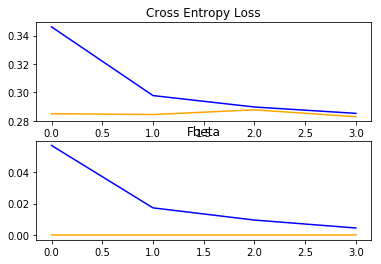

In [16]:
net = define_model()
    
history = net.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs,
    class_weight = class_weight.values(),
    validation_data=(X_test, y_test), 
    callbacks=[es_callback, reduce_lr_acc]
)
    
# learning curves
summarize_diagnostics(history)



Romance (0.313)
Comedy (0.273)
Action (0.244)


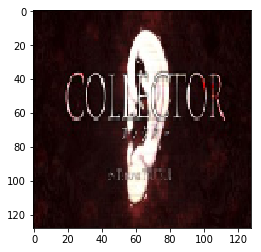

In [26]:
randint = np.random.randint(1, manga.shape[0], 1)[0]
naruto_poster = manga["pics_ref"].iloc[randint]
img = image.load_img(naruto_poster, target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(manga.columns[8:])
proba = net.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

# Model 3 

In [ ]:
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=nclass):
    # load model
    model = VGG16(include_top=False, input_shape=in_shape)
    # mark loaded layers as not trainable
    for layer in model.layers: 
        layer.trainable = False
    
    flat1 = Flatten()(model.layers[-1].output)
    model.get_layer('block5_conv1').trainable = True
    model.get_layer('block5_conv2').trainable = True
    model.get_layer('block5_conv3').trainable = True
    model.get_layer('block5_pool').trainable = True
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(out_shape, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.04, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    return model

vgg = define_model()
    
history = vgg.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs,
    #class_weight = class_weight.values(),
    validation_data=(X_test, y_test), 
    callbacks=[es_callback, reduce_lr_acc]
)
    
# learning curves
summarize_diagnostics(history)

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# Model 4 

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Model 5 

In [10]:
from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 
from keras import regularizers
from keras import optimizers
from keras.models import load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile

'''
https://towardsdatascience.com/the-quest-of-higher-accuracy-for-cnn-models-42df5d731faf
'''

visible = Input(shape=(256,256,3))
conv1 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)
conv2 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)
bat1 = BatchNormalization()(conv2)
zero1 = ZeroPadding2D(padding=(1, 1))(bat1)

conv3 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(zero1)
conv4 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(conv3)
bat2 = BatchNormalization()(conv4)

conv5 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(bat2)
conv6 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(conv5)
bat3 = BatchNormalization()(conv6)
pool1 = MaxPooling2D(pool_size=(2, 2))(bat3)
zero2 = ZeroPadding2D(padding=(1, 1))(pool1)

conv7 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(zero2)
conv8 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv7)
bat4 = BatchNormalization()(conv8)

conv9 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(bat4)
conv10 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv9)
bat5 = BatchNormalization()(conv10)

conv11 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(bat5)
conv12 = Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv11)
bat6 = BatchNormalization()(conv12)
pool2 = MaxPooling2D(pool_size=(2, 2))(bat6)

conv13 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(pool2)
conv14 = Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.02))(conv13)
bat7 = BatchNormalization()(conv14)

conv15 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05))(bat7)
conv16 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv15)
bat8 = BatchNormalization()(conv16)

flat = Flatten()(bat8)
hidden1 = Dense(32, activation='relu')(flat)
drop1 = Dropout(0.3)(hidden1)

hidden2 = Dense(32, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)

output = Dense(nclass, activation='sigmoid')(drop2)
model = Model(inputs=visible, outputs=output)

opt = optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer= opt, 
              loss='binary_crossentropy',
              metrics=['accuracy', fbeta])
              
Callbacks=[EarlyStopping(patience=3, restore_best_weights=True), 
           ReduceLROnPlateau(patience=2), 
           ModelCheckpoint(filepath='CNN.h5', save_best_only=True)]    

model.summary()

W1015 06:53:29.271482 140424280610560 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1015 06:53:29.503161 140424280610560 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1015 06:53:29.636263 140424280610560 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1015 06:53:29.809808 140424280610560 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1015 06:53:29.810845 1404242806

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 16)      64        
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 254, 254, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 252, 252, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 250, 250, 32)      9248      
__________

In [11]:
epochs = 5
batch_size = 128

datagen = ImageDataGenerator(
    zoom_range=0.25,# randomly zoom into images
    shear_range=0.3, # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    channel_shift_range=0.4, #randomly shift rgb channel
    rotation_range=90,# randomly rotate images
    width_shift_range=0.1,# randomly shift images horizontally
    height_shift_range=0.1,# randomly shift images vertically
    horizontal_flip=True,# randomly flip images
    vertical_flip=False)# randomly flip images

model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs,
    class_weight = class_weight.values(),
    validation_data=(X_test, y_test), 
    callbacks=Callbacks)

Epoch 1/5
201/201 [==============================] - 4063s 20s/step - loss: 2.8244 - acc: 0.8839 - fbeta: 0.0392 - val_loss: 0.5535 - val_acc: 0.9103 - val_fbeta: 0.0000e+00
Epoch 2/5
201/201 [==============================] - 4073s 20s/step - loss: 0.3160 - acc: 0.9110 - fbeta: 0.0000e+00 - val_loss: 0.3001 - val_acc: 0.9103 - val_fbeta: 0.0000e+00
Epoch 3/5
201/201 [==============================] - 4083s 20s/step - loss: 0.2775 - acc: 0.9111 - fbeta: 0.0000e+00 - val_loss: 0.2680 - val_acc: 0.9103 - val_fbeta: 0.0000e+00
Epoch 4/5
201/201 [==============================] - 4105s 20s/step - loss: 0.2742 - acc: 0.9111 - fbeta: 0.0000e+00 - val_loss: 0.2670 - val_acc: 0.9103 - val_fbeta: 0.0000e+00
Epoch 5/5
201/201 [==============================] - 4064s 20s/step - loss: 0.2727 - acc: 0.9110 - fbeta: 0.0000e+00 - val_loss: 0.2668 - val_acc: 0.9103 - val_fbeta: 0.0000e+00


In [16]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Saved model to disk


Romance (0.301)
Comedy (0.242)
Action (0.178)


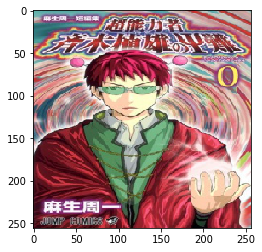

In [70]:
randint = np.random.randint(1, manga.shape[0], 1)[0]
poster = manga["pics_ref"].iloc[randint]
img = image.load_img(poster, target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(manga.columns[8:])
proba = model.predict(img.reshape(1,256,256,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

# Rec 

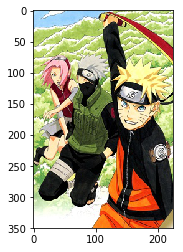

image loaded successfully!


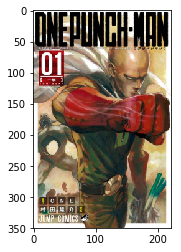

image loaded successfully!


In [71]:
from urllib.request import urlopen
from PIL import Image

c = manga.query("title == 'Naruto'")["poster"].iloc[0]
one_punch_poster = manga.query("title == 'One_Punch-Man'")["poster"].iloc[0]
#berserk_poster = manga.query("title == 'Berserk'")["poster"].iloc[0]

for poster in [naruto_poster, one_punch_poster] :
    img = Image.open(urlopen(poster))
    plt.imshow(img)
    plt.show()
    print("image loaded successfully!")

In [75]:
image_features_extractor = Model(inputs=model.input,  outputs=model.layers[-2].output)
img_features = image_features_extractor.predict(X)

cosSimilarities = cosine_similarity(img_features)
cos_similarities_df = pd.DataFrame(cosSimilarities,
                                   columns=manga["pics_ref"],
                                   index=manga["pics_ref"])

In [92]:

cos_similarities_df = pd.DataFrame(cosSimilarities,
                                   columns=manga["pics_ref"],
                                   index=manga["pics_ref"])

In [113]:
def most_similar_to(given_img, nb_closest_images = 5):

    print("-----------------------------------------------------------------------")
    print("original manga:")

    original = load_img(given_img, target_size=(256,256,3))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar manga:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        img = image.load_img(closest_imgs[i], target_size=(256,256,3))
        plt.imshow(img)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original manga:


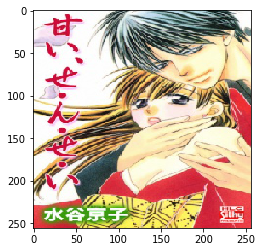

-----------------------------------------------------------------------
most similar manga:


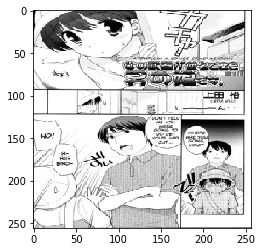

similarity score :  1.0


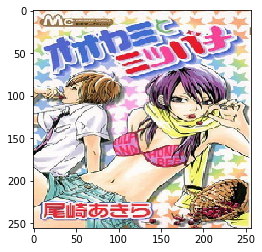

similarity score :  1.0


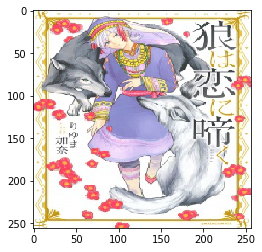

similarity score :  1.0


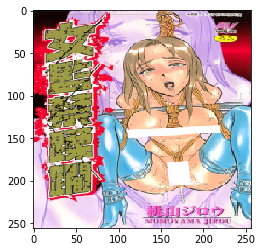

similarity score :  1.0


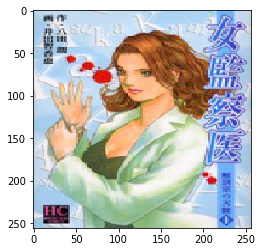

similarity score :  1.0


In [116]:
randint = np.random.randint(1, manga.shape[0], 1)[0]
poster = manga["pics_ref"].iloc[randint]
most_similar_to(poster)

In [ ]:
closest_imgs